In [1]:
import import_ipynb
from mlwpy import *
%matplotlib inline

importing Jupyter notebook from mlwpy.ipynb


In [2]:
# 2.4 Probability
np.random.randint(1, 7)

4

In [3]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size = 100)

<BarContainer object of 6 artists>

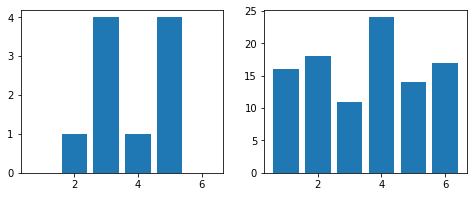

In [4]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)

(0.0, 55.0)

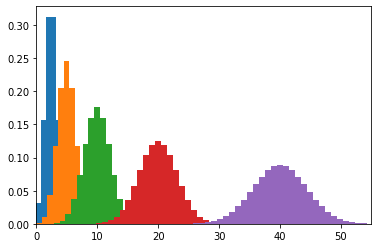

In [5]:
# 2.4.4 Distributions
import scipy.stats as ss

b = ss.distributions.binom

for flips in [5, 10, 20, 40, 80]:
    # binomial with .5 is result of many coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
plt.xlim(0, 55)

(0.0, 55.0)

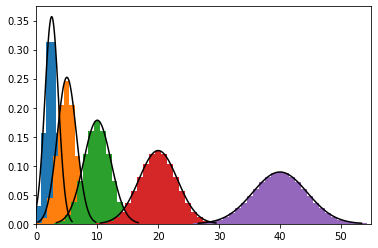

In [6]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    # binomial coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, 0.5)
    plt.hist(success, flips, weights=our_distribution)
    
    # normal approximation to that binomial
    # we have to set mean and standard deviation
    mu = flips * 0.5,
    std_dev = np.sqrt(flips * .5 * (1 - .5))
    
    # we have to set up both the x and y points for the normal
    # get the ys from the distribution (a function)
    # we have to feed it xs, we set those up here
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k')
    
plt.xlim(0, 55)

In [7]:
# 2.5 Linear Combinations, Weighted Sums, and Doct Products

(2 * 12.50) + (12 * .5) + (3 * 1.75)

36.25

In [8]:
2 + 12 + 3

17

In [9]:
# pure python old school
quanity = [2, 12, 3]
costs = [12.5, .5, 1.75]
partial_cost = []
for q, c in zip(quanity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [10]:
# pure python for the new-school, cool kids
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
sum(q*c for q, c in zip(quantity, costs))

36.25

In [11]:
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity * costs) #element wise multiplication

36.25

In [12]:
print(quantity.dot(costs),
     np.dot(quantity, costs),
     quantity @ costs,
     
     sep='\n')

36.25
36.25
36.25


In [13]:
for q_i, c_i in zip(quantity, costs):
    print("{:2d} {:5.2f} --> {:5.2f}".format(q_i, c_i, q_i * c_i))
    
print("Total: ",
     sum(q*c for q,c in zip(quantity,costs))) #cool kid method

 2 12.50 --> 25.00
12  0.50 -->  6.00
 3  1.75 -->  5.25
Total:  36.25


In [14]:
# weighted average mean
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3)

print("weights: ", weights)
print("via mean: ", np.mean(values))
print("via weights and dot: ", np.dot(weights, values))

weights:  [0.3333 0.3333 0.3333]
via mean:  20.0
via weights and dot:  20.0


In [15]:
values = np.array([10, 20, 30])
weights = np.array([.5, .25, .25])

np.dot(weights, values)

17.5

In [16]:
# odd, even
payoffs = np.array([1.0, -.5])
probs = np.array([.5, .5])
np.dot(payoffs, probs)

0.25

In [17]:
def is_even(n):
    # if remainder 0, value is even
    return n % 2 == 0
winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1, 7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

2524.0


In [18]:
# 2.5.2 Sums of Squares
values = np.array([5, -3, 2, 1])
squares = values * values # element-wise multi
print(squares,
     np.sum(squares),
     np.dot(values, values), sep='\n')

[25  9  4  1]
39
39


In [19]:
# 2.5.3 Sum of Squared Errors

errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors': errors,
                     'squared': errors*errors}))

,errors,squared
0,5.0000,25.0000
1,-5.0000,25.0000
2,3.2000,10.2400
3,-1.1000,1.2100


In [20]:
np.dot(errors, errors)

61.45

Text(0, 0.5, 'Cost\n (Parking Only)')

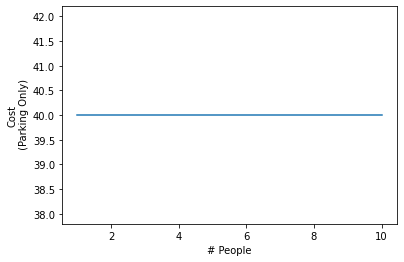

In [21]:
# 2.6 A Geometric View: Points in Space
# 2.6.1 Lines

people = np.arange(1, 11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()
ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n (Parking Only)")

In [22]:
people = np.arange(1, 11)
total_cost = 80.0 * people + 40.0

In [23]:
# .T (transpose) to save vertical space in printout
display(pd.DataFrame({'total_cost': total_cost.astype(np.int)},
                    index=people).T)

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


Text(0, 0.5, 'Total Cost')

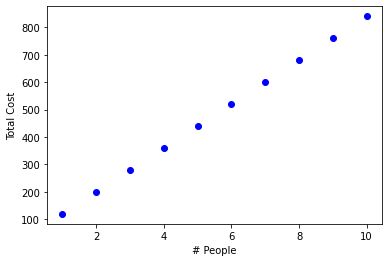

In [24]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo') # plot x, y using blue circle markers
ax.set_xlabel("# People")
ax.set_ylabel("Total Cost")

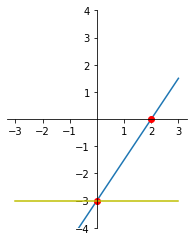

In [27]:
# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

# slope (m) and intercept (b)
m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4, 4)
high_school_style(ax)

ax.plot(0, -3, 'ro')h
ax.plot(2, 0, 'ro') # red circles

# y = mx + b with m=0 gives y = b
ys = 0 * xs + b
ax.plot(xs, ys, 'y')

In [29]:
# np.c_[] lets us create an array column by column
xs = np.linspace(-3, 3, 100)
xs_ps1 = np.c_[xs, np.ones_like(xs)]

# view the first few rows
display(pd.DataFrame(xs_ps1).head())

,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


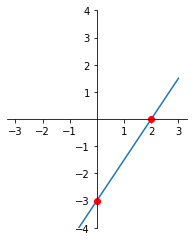

In [30]:
w = np.array([1.5, -3])
ys = np.dot(xs_ps1, w)

ax = plt.gca()
ax.plot(xs, ys)

# styling
ax.set_ylim(-4, 4)
high_school_style(ax)

ax.plot(0, -3, 'ro') # y-intercept
ax.plot(2, 0, 'ro'); # two steps to the right should be three whole steps up